# EDA, Feature Engineering, and Modeling

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's read the cleaned data into pandas dataframes. The test data will not be considered since it isn't labeled. 

In [48]:
#weather = pd.read_csv('../input/weather.csv')
#train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
trap = pd.read_csv('../input/cleaned_trap_weather_data.csv')

In [49]:
#print('weather data size',weather.shape)
#print('train data size',train.shape)
#print('test data size',test.shape)
print('trap data size',trap.shape)

trap data size (10506, 29)


In [50]:
trap.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,18,6.5
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,18,6.5
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,18,6.5
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,0.0,9.0,421,1917,0.0,29.39,30.11,5.8,18,6.5


In [51]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [52]:
trap.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed'],
      dtype='object')

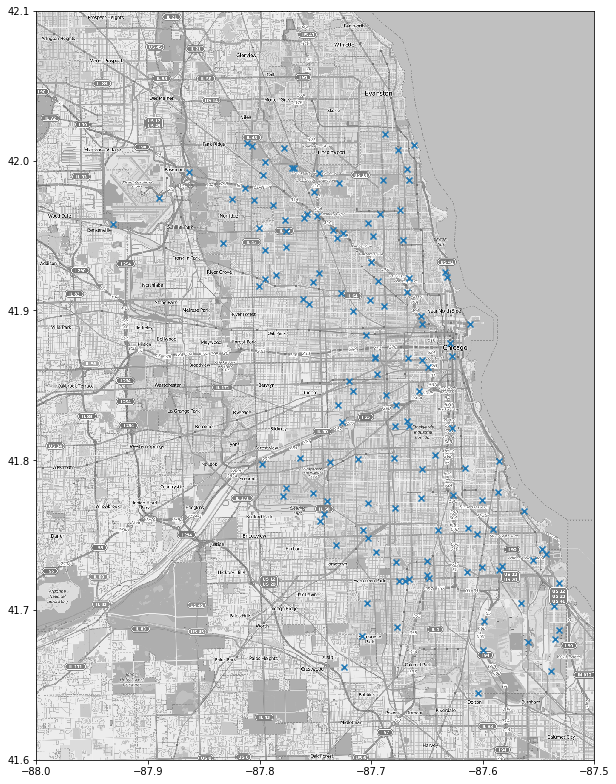

In [53]:
mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")
traps = trap[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.savefig('Chicago.png')

In [54]:
trap.groupby(['Trap']).describe()

Block                                          Latitude             ...  \
      count  mean  std   min   25%   50%   75%   max    count       mean  ...   
Trap                                                                      ...   
T001   15.0  40.0  0.0  40.0  40.0  40.0  40.0  40.0     15.0  41.953705  ...   
T002  185.0  41.0  0.0  41.0  41.0  41.0  41.0  41.0    185.0  41.954690  ...   
T003  122.0  46.0  0.0  46.0  46.0  46.0  46.0  46.0    122.0  41.964242  ...   
T004   12.0  49.0  0.0  49.0  49.0  49.0  49.0  49.0     12.0  41.962728  ...   
T005   14.0  60.0  0.0  60.0  60.0  60.0  60.0  60.0     14.0  41.942114  ...   
...     ...   ...  ...   ...   ...   ...   ...   ...      ...        ...  ...   
T236   33.0  62.0  0.0  62.0  62.0  62.0  62.0  62.0     33.0  41.994679  ...   
T237    3.0  29.0  0.0  29.0  29.0  29.0  29.0  29.0      3.0  41.738903  ...   
T238    7.0  34.0  0.0  34.0  34.0  34.0  34.0  34.0      7.0  41.753391  ...   
T900  750.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0    750.0  41.974689  ...   
T903  140.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0    140.0  41.957799  ...   

     ResultDir       AvgSpeed                                               \
           75%   max    count      mean       std  min    25%   50%    75%   
Trap                                                                         
T001     24.50  30.0     15.0  6.526667  2.268878  4.1  4.600  5.80   8.05   
T002     24.00  36.0    185.0  7.367568  2.331548  2.1  5.500  7.30   9.00   
T003     24.75  36.0    122.0  7.140984  2.425442  2.1  5.275  6.70   8.50   
T004     19.00  30.0     12.0  8.491667  3.622771  4.3  5.600  6.95  12.20   
T005     19.00  25.0     14.0  7.221429  3.207246  4.1  4.900  6.00   7.85   
...        ...   ...      ...       ...       ...  ...    ...   ...    ...   
T236     24.00  35.0     33.0  7.284848  2.540315  3.3  4.900  7.80   9.30   
T237     22.00  23.0      3.0  6.700000  3.862642  3.3  4.600  5.90   8.40   
T238     29.50  36.0      7.0  7.614286  3.424631  3.3  5.150  7.00  10.90   
T900     25.75  36.0    750.0  7.643333  2.554465  2.1  5.600  7.40   9.40   
T903     25.00  36.0    140.0  7.550714  2.661787  2.1  5.600  7.30   9.40   

            
       max  
Trap        
T001  10.9  
T002  15.0  
T003  15.0  
T004  13.1  
T005  13.1  
...    ...  
T236  14.0  
T237  10.9  
T238  10.9  
T900  15.0  
T903  15.0  

[136 rows x 184 columns]

In [55]:
trap.groupby(['Trap']).Trap.count()

Trap
T001     15
T002    185
T003    122
T004     12
T005     14
       ... 
T236     33
T237      3
T238      7
T900    750
T903    140
Name: Trap, Length: 136, dtype: int64

In [56]:
trap[['Trap', 'Species']].describe()

,Trap,Species
count,10506,10506
unique,136,7
top,T900,CULEX PIPIENS/RESTUANS
freq,750,4752


In [57]:
trap.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed'],
      dtype='object')

In [58]:
# Extract month from date and convert to integer
trap['month']=pd.DatetimeIndex(trap['Date']).month.astype(int)

In [59]:
# Extract year from date and convert to integer
trap['year']=pd.DatetimeIndex(trap['Date']).year.astype(int)

In [60]:
trap.drop(['AddressNumberAndStreet','AddressAccuracy'],axis=1,inplace=True)

In [61]:
trap.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'Latitude',
       'Longitude', 'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin',
       'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise',
       'Sunset', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed',
       'ResultDir', 'AvgSpeed', 'month', 'year'],
      dtype='object')

In [62]:
trap.head(1)

,Date,Address,Species,Block,Street,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,...,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,month,year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.95469,-87.800991,1,0,...,421,1917,0.0,29.39,30.11,5.8,18,6.5,5,2007


In [63]:
# Checking the correlation of all independent variables with WnvPresent
trap.corr()['WnvPresent'].sort_values(ascending=False)

WnvPresent      1.000000
NumMosquitos    0.196820
Sunrise         0.105227
month           0.100143
DewPoint        0.090460
WetBulb         0.084719
Tmin            0.072719
Tavg            0.066043
Cool            0.058953
Depart          0.055436
year            0.050865
Tmax            0.050536
Latitude        0.028697
ResultDir       0.007922
StnPressure     0.005963
SeaLevel        0.005620
Block           0.004877
PrecipTotal    -0.021426
AvgSpeed       -0.029958
ResultSpeed    -0.051177
Heat           -0.056813
Longitude      -0.060345
Sunset         -0.068451
Station              NaN
Name: WnvPresent, dtype: float64

In [64]:
trap['NumMosquitos'].sort_values()

0        1
4730     1
4731     1
4734     1
4741     1
        ..
1707    50
1706    50
4197    50
4086    50
7073    50
Name: NumMosquitos, Length: 10506, dtype: int64

In [65]:
trap.dtypes

Date             object
Address          object
Species          object
Block             int64
Street           object
Trap             object
Latitude        float64
Longitude       float64
NumMosquitos      int64
WnvPresent        int64
Station           int64
Tmax              int64
Tmin              int64
Tavg            float64
Depart            int64
DewPoint          int64
WetBulb         float64
Heat            float64
Cool            float64
Sunrise           int64
Sunset            int64
PrecipTotal     float64
StnPressure     float64
SeaLevel        float64
ResultSpeed     float64
ResultDir         int64
AvgSpeed        float64
month             int64
year              int64
dtype: object

In [66]:
trap=trap.reindex(columns = ['Date','month', 'year', 'Block','Latitude','Longitude', 'Street',
                                         'Trap','Species','NumMosquitos','WnvPresent',
                                         'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
                                         'WetBulb','Heat', 'Cool',
                                         'Sunrise', 'Sunset','PrecipTotal','StnPressure','Sealevel',
                                         'ResultSpeed','ResultDir', 'AvgSpeed', 'Station','Address'])

### Correlation study for continuous features

First, I consider the continuous features and find the correlation between them. I consider qualitative features such as species or Traps for Random Forest or other ML methods that work well with qualitative data. 

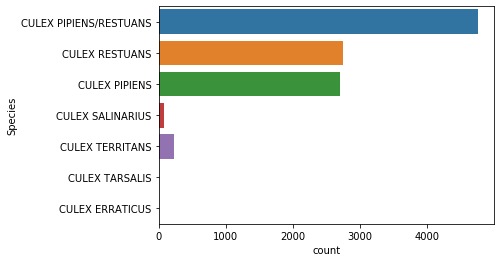

In [67]:
# Create count plot with region on the y-axis
sns.countplot(y=trap.Species)

# Show plot
plt.show()

In [68]:
trap.columns

Index(['Date', 'month', 'year', 'Block', 'Latitude', 'Longitude', 'Street',
       'Trap', 'Species', 'NumMosquitos', 'WnvPresent', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'PrecipTotal', 'StnPressure', 'Sealevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'Station', 'Address'],
      dtype='object')

In [ ]:
#trap.groupby(['year','month'])['WnvPresent'].count().plot()

In [69]:
## Label encode the trap column
from sklearn import ensemble, preprocessing
lbls = preprocessing.LabelEncoder()
lbls.fit(list(trap['Trap'].values))
trap['Trap'] = lbls.transform(trap['Trap'].values)


In [70]:
trap.head()

,Date,month,year,Block,Latitude,Longitude,Street,Trap,Species,NumMosquitos,...,Sunrise,Sunset,PrecipTotal,StnPressure,Sealevel,ResultSpeed,ResultDir,AvgSpeed,Station,Address
0,2007-05-29,5,2007,41,41.954690,-87.800991,N OAK PARK AVE,1,CULEX PIPIENS/RESTUANS,1,...,421,1917,0.0,29.39,NaN,5.8,18,6.5,1,"4100 North Oak Park Avenue, Chicago, IL 60634,..."
1,2007-05-29,5,2007,41,41.954690,-87.800991,N OAK PARK AVE,1,CULEX RESTUANS,1,...,421,1917,0.0,29.39,NaN,5.8,18,6.5,1,"4100 North Oak Park Avenue, Chicago, IL 60634,..."
2,2007-05-29,5,2007,62,41.994991,-87.769279,N MANDELL AVE,6,CULEX RESTUANS,1,...,421,1917,0.0,29.39,NaN,5.8,18,6.5,1,"6200 North Mandell Avenue, Chicago, IL 60646, USA"
3,2007-05-29,5,2007,79,41.974089,-87.824812,W FOSTER AVE,13,CULEX PIPIENS/RESTUANS,1,...,421,1917,0.0,29.39,NaN,5.8,18,6.5,1,"7900 West Foster Avenue, Chicago, IL 60656, USA"
4,2007-05-29,5,2007,79,41.974089,-87.824812,W FOSTER AVE,13,CULEX RESTUANS,4,...,421,1917,0.0,29.39,NaN,5.8,18,6.5,1,"7900 West Foster Avenue, Chicago, IL 60656, USA"


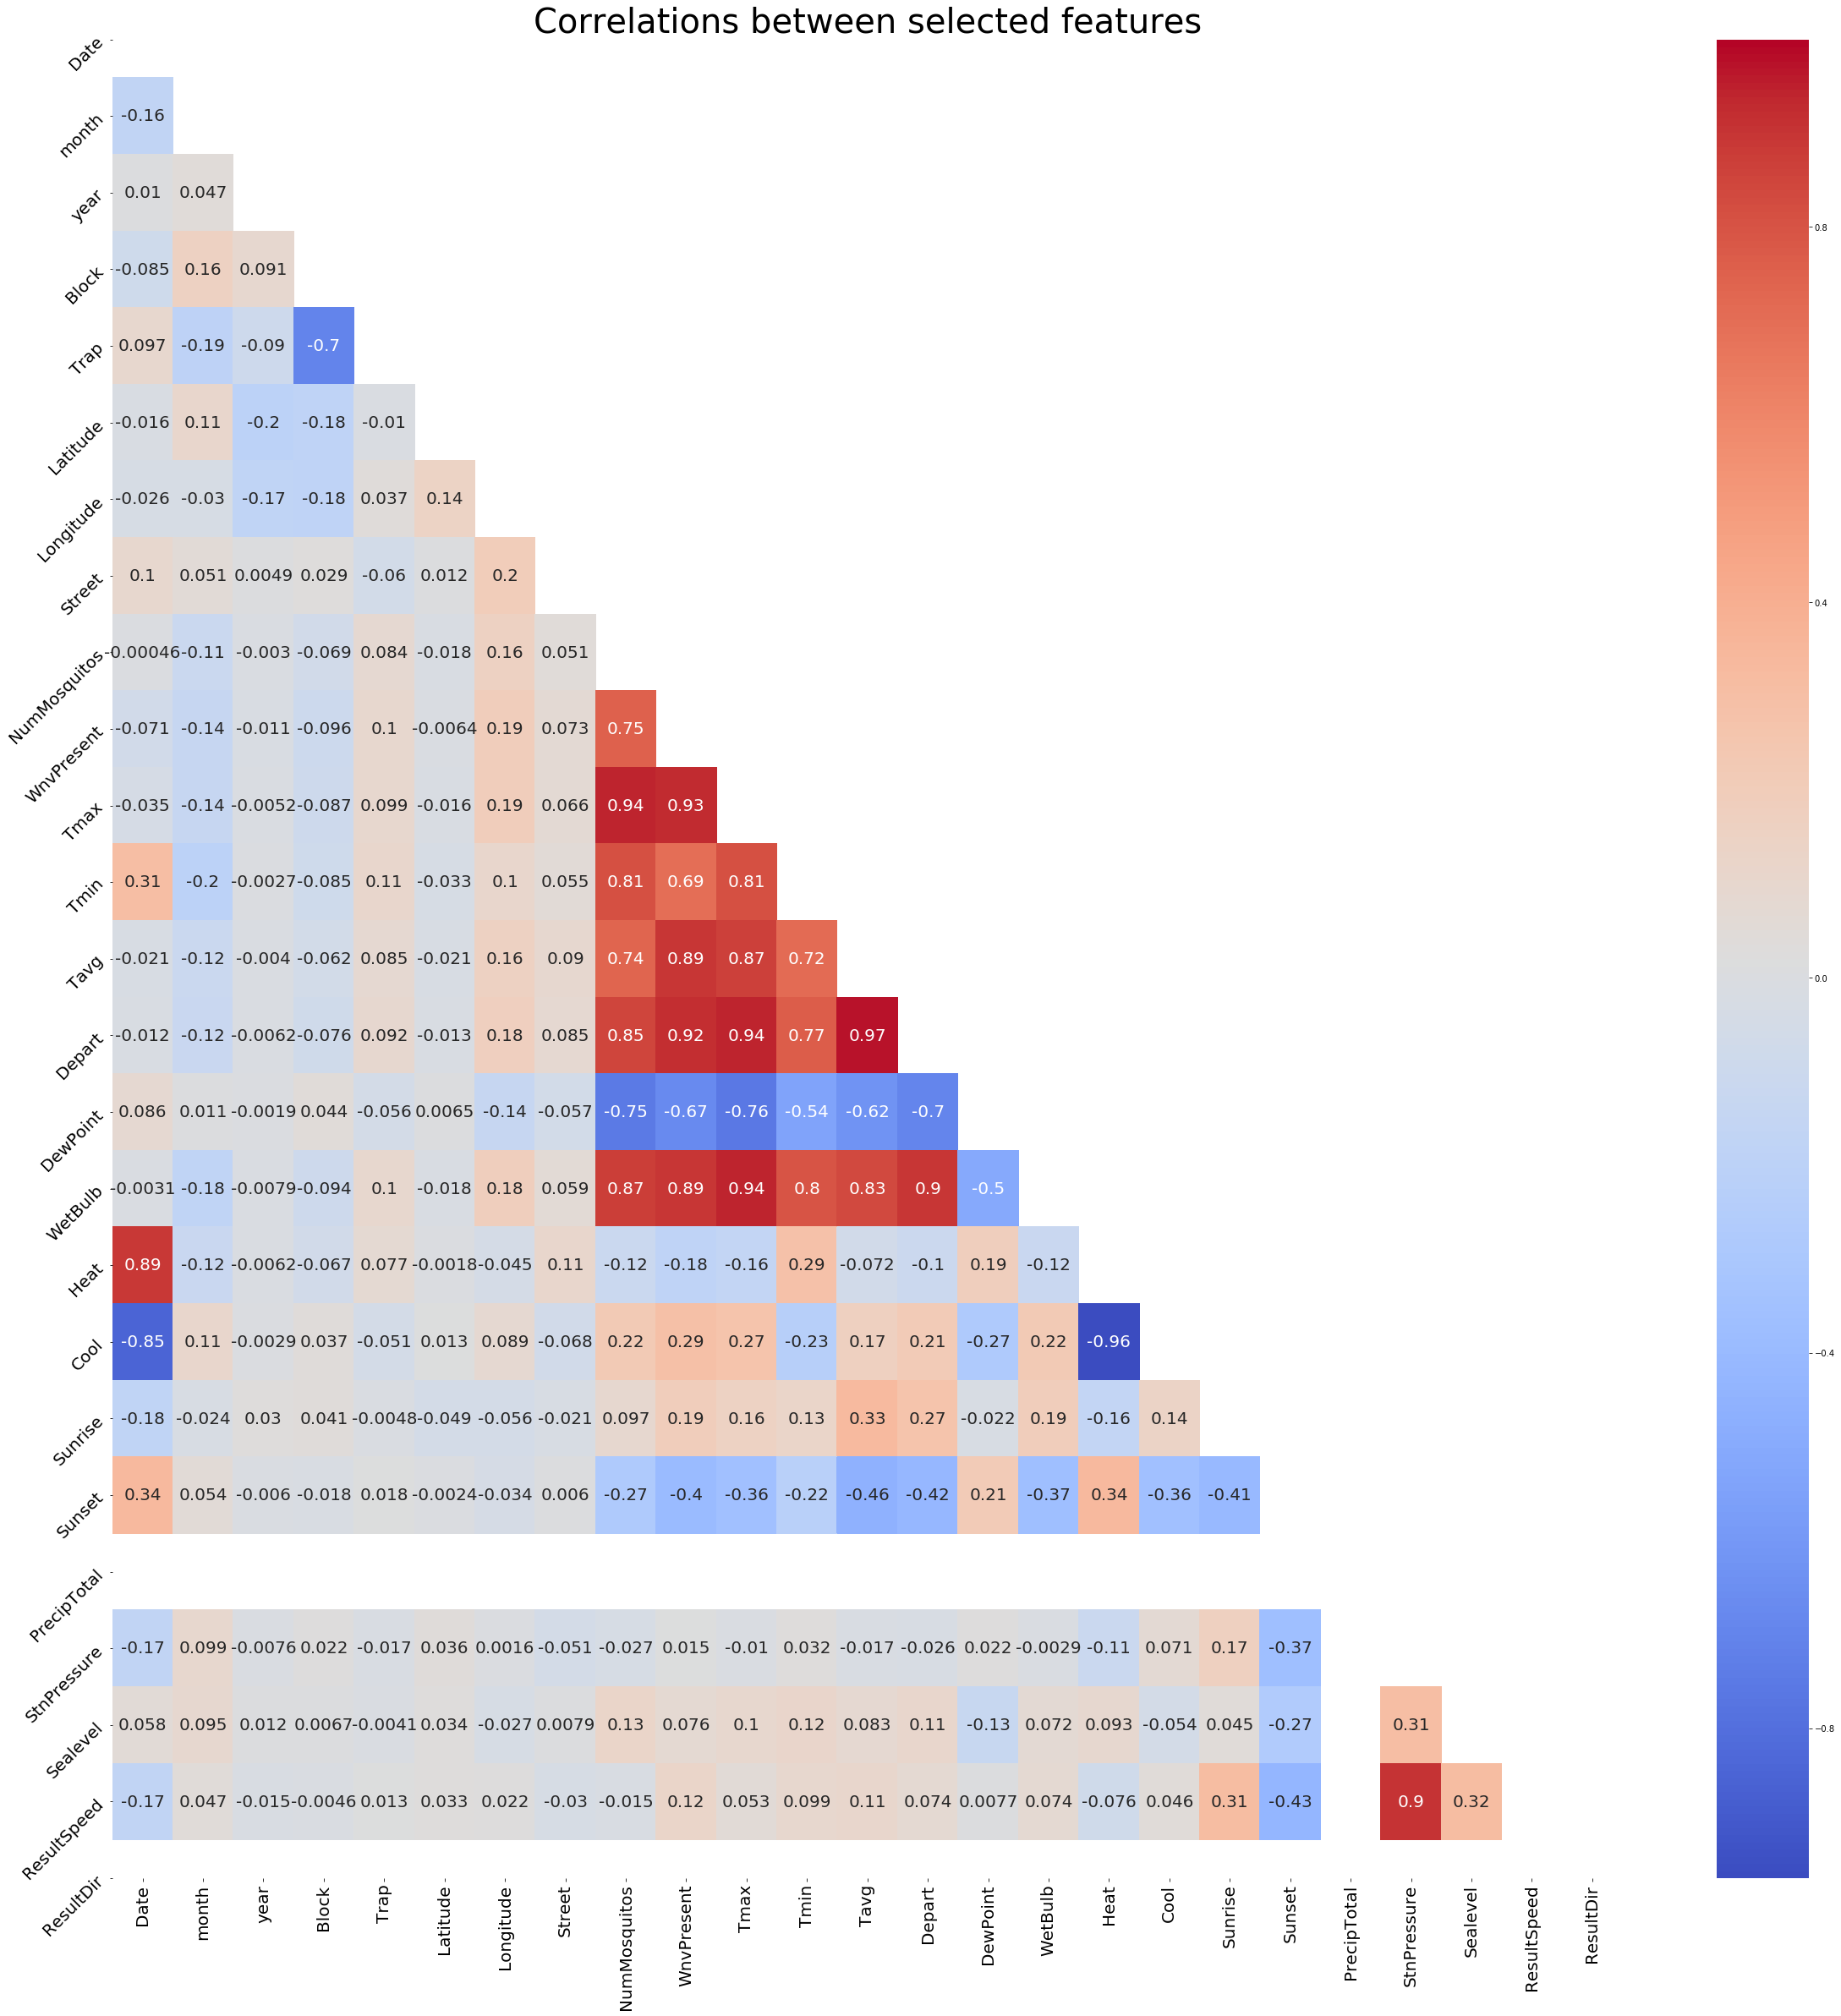

In [71]:
# Heatmap to look into the correlation between selected features(especially continuous)
corr = trap.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

labels=['Date','month', 'year', 'Block','Trap','Latitude','Longitude', 'Street',
                                         'NumMosquitos','WnvPresent',
                                         'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
                                         'WetBulb','Heat', 'Cool',
                                         'Sunrise', 'Sunset','PrecipTotal','StnPressure','Sealevel',
                                         'ResultSpeed','ResultDir', 'AvgSpeed', 'Station']

plt.subplots(figsize=(40,40))
ax = plt.axes()
sns.heatmap(corr,mask=mask,annot = True,annot_kws={'size':20},cmap="coolwarm",ax=ax)
ax.set_xticklabels(labels,size = 20,rotation=90)
ax.set_yticklabels(labels,size = 20,rotation=45)
ax.set_title('Correlations between selected features', size = 40)
plt.savefig('correlation_features.png')

1. Sunset and sunrise are highly correlated. Sunset will be removed.
2. Tavg is highly correlated with Tmax and Tmin. Tavg will be removed.
3. Wetbulb is highly correlated with ResultSpeed. Resultspeed will be removed.
4. Sealevel is highly correlated with PrecipTotal. Sealevel will be removed.

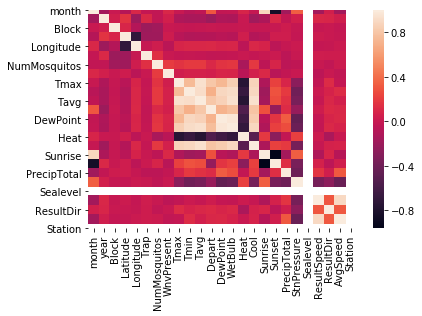

In [73]:
sns.heatmap(trap.corr())

In [74]:
#Correlation with output variable
cor = trap.corr()
cor_target = abs(cor['WnvPresent'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0]
relevant_features.sort_values(ascending=False)

WnvPresent      1.000000
NumMosquitos    0.196820
Sunrise         0.105227
month           0.100143
DewPoint        0.090460
WetBulb         0.084719
Tmin            0.072719
Sunset          0.068451
Tavg            0.066043
Longitude       0.060345
Cool            0.058953
Heat            0.056813
Depart          0.055436
ResultSpeed     0.051177
year            0.050865
Tmax            0.050536
AvgSpeed        0.029958
Latitude        0.028697
PrecipTotal     0.021426
Trap            0.012193
ResultDir       0.007922
StnPressure     0.005963
Block           0.004877
Name: WnvPresent, dtype: float64

In [75]:
trap_2=trap[['Date','month', 'year', 'Block','Trap','Latitude','Longitude', 'Street',
                                         'Species','NumMosquitos','WnvPresent',
                                         'Tmax', 'Tmin', 'Depart', 'DewPoint',
                                         'WetBulb','Heat', 'Cool',
                                         'Sunrise', 'PrecipTotal','StnPressure',
                                         'ResultDir', 'AvgSpeed', 'Station']]

In [76]:
#Correlation with output variable
cor = trap_2.corr()
cor_target = abs(cor['WnvPresent'])
#Selecting highly correlated features
relevant_features2 = cor_target[cor_target>0.0]
relevant_features2.sort_values(ascending=False)

WnvPresent      1.000000
NumMosquitos    0.196820
Sunrise         0.105227
month           0.100143
DewPoint        0.090460
WetBulb         0.084719
Tmin            0.072719
Longitude       0.060345
Cool            0.058953
Heat            0.056813
Depart          0.055436
year            0.050865
Tmax            0.050536
AvgSpeed        0.029958
Latitude        0.028697
PrecipTotal     0.021426
Trap            0.012193
ResultDir       0.007922
StnPressure     0.005963
Block           0.004877
Name: WnvPresent, dtype: float64

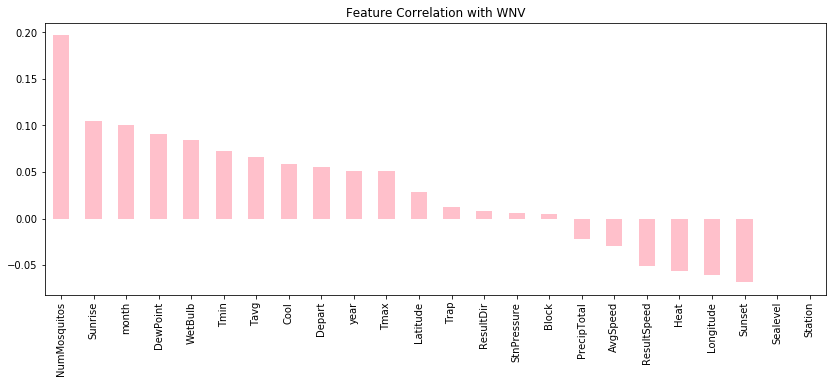

In [77]:
fig = plt.figure(figsize=(14,5))
trap.corr()['WnvPresent'].sort_values(ascending=False)[1:].plot(kind='bar', color='pink')
plt.xticks(size = 10);
#plt.figure(figsize=(14,5))
plt.title("Feature Correlation with WNV")
plt.show()

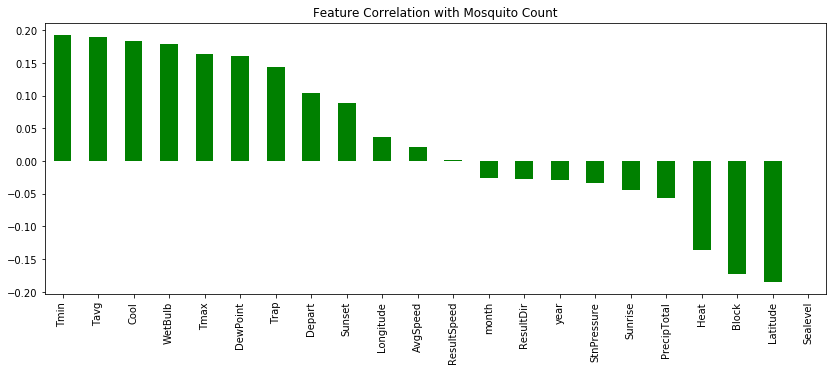

In [78]:
fig = plt.figure(figsize=(14,5))
trap.drop(['WnvPresent','Station'], 
        axis=1).corr()['NumMosquitos'].sort_values(ascending=False)[1:].plot(kind='bar', color= 'green')
plt.title("Feature Correlation with Mosquito Count")
plt.xticks(size = 10);

Text(0.5, 1.0, 'Feature Correlation with West Nile Virus')

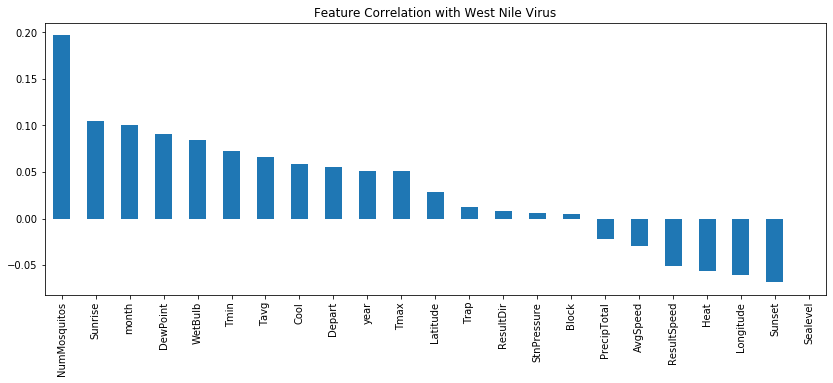

In [79]:
fig = plt.figure(figsize=(14,5))
trap.drop(['Station'], 
        axis=1).corr()['WnvPresent'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.xticks(size = 10);
plt.title("Feature Correlation with West Nile Virus")

In [80]:
trap.isna().sum().sort_values(ascending = False)

Sealevel        10506
Address             0
Tavg                0
month               0
year                0
Block               0
Latitude            0
Longitude           0
Street              0
Trap                0
Species             0
NumMosquitos        0
WnvPresent          0
Tmax                0
Tmin                0
Depart              0
Station             0
DewPoint            0
WetBulb             0
Heat                0
Cool                0
Sunrise             0
Sunset              0
PrecipTotal         0
StnPressure         0
ResultSpeed         0
ResultDir           0
AvgSpeed            0
Date                0
dtype: int64

# Logistic Regression

In [81]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [82]:
#df_X = trap[['Sunrise','month', 'DewPoint', 'WetBulb', 'Tmin', 'Sunset', 'Tavg','Longitude','Cool', 'Heat', 'Depart']]
#df_Y = trap['WnvPresent']

#df_X = trap[['Sunrise','month', 'Trap','Longitude', 'Latitude', 'DewPoint', 'WetBulb', 'Tmin', 'Tmax','Longitude','Heat', 'Depart']]
df_X = trap[['Sunrise','month', 'Trap','NumMosquitos','Longitude', 'Latitude', 'DewPoint', 'WetBulb', 'Tmin', 'Tmax','Longitude','Heat', 'Depart']]
df_Y = trap['WnvPresent']
df_X.columns
#df_X = trap[['Sunrise','month', 'DewPoint']]

Index(['Sunrise', 'month', 'Trap', 'NumMosquitos', 'Longitude', 'Latitude',
       'DewPoint', 'WetBulb', 'Tmin', 'Tmax', 'Longitude', 'Heat', 'Depart'],
      dtype='object')

In [83]:
df_Y.describe()

count    10506.000000
mean         0.052446
std          0.222936
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: WnvPresent, dtype: float64

In [84]:
# Step 1: split your features and labels into train and test data
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3) # Step 2: Define which model you want to use

In [85]:
# Step 1: split your features and labels into train and test data

trap_rf = trap.drop(['WnvPresent', 'Sealevel', 'Street','Date', 'year','Species', 'Address','Station','NumMosquitos'], axis=1)
                     
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(trap_rf, df_Y, test_size=0.3) # Step 2: Define which model you want to use

In [86]:
from imblearn.over_sampling import RandomOverSampler
method = RandomOverSampler()
#X_resampled, y_resampled = method.fit_sample(X, y) 
#compare_plots(X_resampled, y_resampled, X, y)

X_resampled, y_resampled = method.fit_sample(X_train, y_train)

X_resampled_rf, y_resampled_rf = method.fit_sample(X_train_rf, y_train_rf)


In [87]:
# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Get model performance metrics
y_predicted = model.predict(X_test)
y_predicted_prob = model.predict_proba(X_test)
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[2218  774]
 [  26  134]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      2992
           1       0.15      0.84      0.25       160

    accuracy                           0.75      3152
   macro avg       0.57      0.79      0.55      3152
weighted avg       0.95      0.75      0.82      3152



/Users/seyhankarakulak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [88]:
y_predicted_prob

array([[0.30687306, 0.69312694],
       [0.715297  , 0.284703  ],
       [0.80757349, 0.19242651],
       ...,
       [0.05472451, 0.94527549],
       [0.98268902, 0.01731098],
       [0.87338866, 0.12661134]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b11c910>]],
      dtype=object)

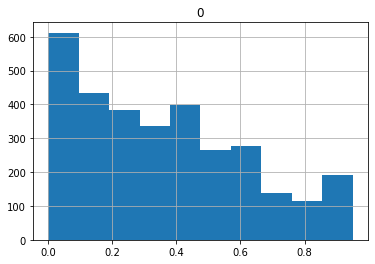

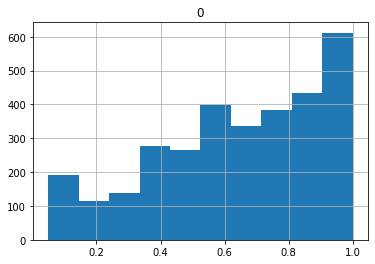

In [89]:
pd.DataFrame(y_predicted_prob[:,1]).hist()
pd.DataFrame(y_predicted_prob[:,0]).hist()

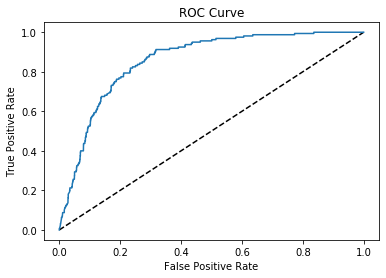

In [90]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

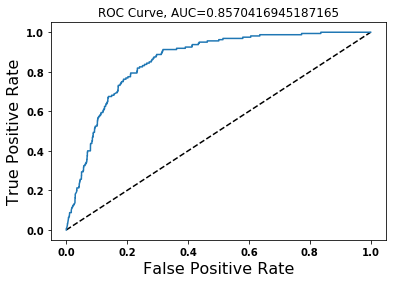

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)
from pylab import *
fontsize = 10
ax = gca()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = %0.4f'% auc_score)
plt.xlabel('False Positive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)
plt.title('ROC Curve, AUC='+str(auc_score))
plt.savefig('ROC_LR.png')
plt.show()

In [92]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

## Applying Tomek Links

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

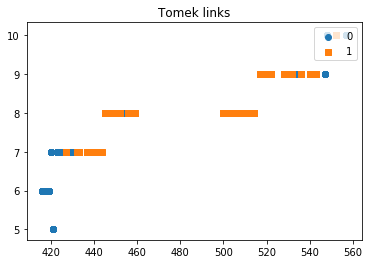

In [93]:
from imblearn.under_sampling import TomekLinks

#tl = TomekLinks(return_indices=True, ratio='majority')
#X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)
#print('Removed indexes:', id_tl)
tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(X_train, y_train)

plot_2d_space(X_tl, y_tl, 'Tomek links')

## Applying SMOTE

Synthetic Minority Over-sampling Technique (SMOTE) is another method to tackle imblanced data sets. SMOTE dcreates new, synthetic samples that are quite similar to the existing observations in the minority class instead of upsampling the exact copies of the minority class.

In [94]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [95]:
# Define the resampling method
#method = SMOTE(kind='regular')
method = SMOTE()

# Create the resampled feature set
X_resampled3, y_resampled3 = method.fit_sample(X_tl, y_tl)

In [96]:
# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled3, y_resampled3)

# Get model performance metrics
y_predicted = model.predict(X_test)
y_predicted_prob = model.predict_proba(X_test)
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[2214  778]
 [  26  134]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      2992
           1       0.15      0.84      0.25       160

    accuracy                           0.74      3152
   macro avg       0.57      0.79      0.55      3152
weighted avg       0.95      0.74      0.82      3152



/Users/seyhankarakulak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


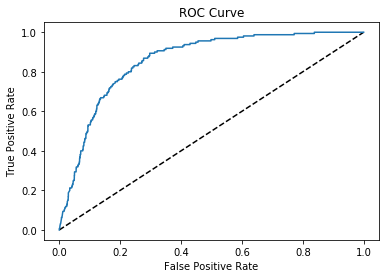

In [97]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Random Forests

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

y_predicted = rf.predict(X_test)
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[2809  183]
 [ 113   47]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2992
           1       0.20      0.29      0.24       160

    accuracy                           0.91      3152
   macro avg       0.58      0.62      0.60      3152
weighted avg       0.92      0.91      0.91      3152



/Users/seyhankarakulak/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


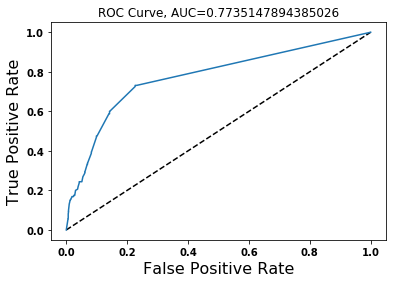

In [99]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)
from pylab import *
fontsize = 10
ax = gca()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = %0.4f'% auc_score)
plt.xlabel('False Positive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)
plt.title('ROC Curve, AUC='+str(auc_score))
plt.savefig('ROC_RF.png')
plt.show()

In [100]:
X_train.columns

Index(['Sunrise', 'month', 'Trap', 'NumMosquitos', 'Longitude', 'Latitude',
       'DewPoint', 'WetBulb', 'Tmin', 'Tmax', 'Longitude', 'Heat', 'Depart'],
      dtype='object')

In [101]:
rf.score(X_train, y_train)

0.9664128365515365

In [102]:
rf.score(X_test, y_test)

0.9060913705583756

In [103]:
y_test.mean()

0.050761421319796954

In [104]:
y_test.describe()

count    3152.000000
mean        0.050761
std         0.219545
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: WnvPresent, dtype: float64

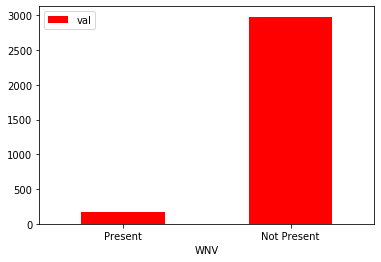

In [105]:
df2 = pd.DataFrame({'WNV':['Present', 'Not Present'], 'val':[172, 2980]})
ax = df2.plot.bar(x='WNV', y='val', rot=0, color='red')
plt.savefig("figure_WNV.png")

In [106]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.7735147894385026

In [107]:
from sklearn import ensemble, preprocessing
clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=1000, min_samples_split=2, random_state=5)
clf.fit(X_resampled, y_resampled)
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index =X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

,importance
NumMosquitos,0.286289
Sunrise,0.131546
Longitude,0.078716
Longitude,0.077639
Latitude,0.074621
Trap,0.074236
month,0.061367
Tmax,0.047204
WetBulb,0.043259
Depart,0.043078


# K-nearest Neighbor

In [108]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

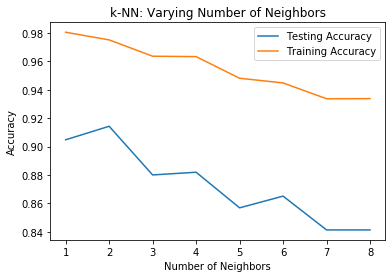

In [109]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_resampled,y_resampled)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_resampled, y_resampled)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [110]:
# Setup a k-NN Classifier with k neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

    # Fit the classifier to the training data
knn.fit(X_resampled,y_resampled)
y_pred = knn.predict(X_test)

In [111]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2556  436]
 [  64   96]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      2992
           1       0.18      0.60      0.28       160

    accuracy                           0.84      3152
   macro avg       0.58      0.73      0.59      3152
weighted avg       0.94      0.84      0.88      3152



In [112]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, y_pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 2556
FP - False Positive 436
FN - False Negative 64
TP - True Positive 96
Accuracy Rate: 0.8413705583756346
Misclassification Rate: 0.15862944162436549
